# Ideas to Test

`DoublePendulumSubclassMomenta` is a refactor trying to plot better Poincaré sections

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from contourpy.util.data import simple

from MathFunctions import *
from DoublePendulumSubclassMomenta import DoublePendulum, DoublePendulumExplorer

In [2]:
l1, l2, m1, m2, M1, M2, g = sp.symbols('l1 l2 m1 m2 M1 M2 g', real=True, positive=True)

# Declare functions
theta1 = sp.Function('theta1')(t)
theta2 = sp.Function('theta2')(t)
p_theta_1 = sp.Function('p_theta_1')(t)
p_theta_2 = sp.Function('p_theta_2')(t)

In [3]:
# Parameters
params = {
    g: 9.81,  # Acceleration due to gravity (m/s^2)
    l1: 1.0,  # Length of the first rod (m)
    l2: 1.0,  # Length of the second rod (m)
    m1: 1.0,  # Mass of the first bob (kg)
    m2: 1.0,   # Mass of the second bob (kg)
    M1: 1.0,
    M2: 1.0
}

# Time vector
stop = 20
fps = 200  # frames/second
no_steps = stop * fps

time = [0, stop, no_steps]

In [4]:
# Initial conditions (theta1, theta2, omega1, omega2)
init_values = [0, 45, 0, 0]
pendulum1 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)

----
&nbsp;
### Potential Energy Calculator

In [5]:
def calculate_potential_energy(theta1_val, theta2_val, parameters, model='simple'):
    """
    Calculate the potential energy of the double pendulum system relative to the datum where theta1 = 0 and theta2 = 0.
    
    Parameters:
    - theta1_val: The angle of the first pendulum (in radians).
    - theta2_val: The angle of the second pendulum (in radians).
    - parameters: A dictionary containing values for l1, l2, m1, m2, M1, M2, g.
    - model: The model type ('simple' or 'compound').
    
    Returns:
    - The relative potential energy V_relative (in Joules).
    """
    l1 = parameters['l1']
    l2 = parameters['l2']
    g = parameters['g']

    if model == 'simple':
        m1 = parameters['m1']
        m2 = parameters['m2']

        # Define potential energy function
        V = -(m1 + m2) * g * l1 * np.cos(theta1_val) - m2 * g * l2 * np.cos(theta2_val)

    elif model == 'compound':
        M1 = parameters['M1']
        M2 = parameters['M2']

        # Define potential energy function for compound model
        V = -M1 * g * (l1 / 2) * np.cos(theta1_val) - M2 * g * ((l1 * np.cos(theta1_val)) + (l2 / 2) * np.cos(theta2_val))
    
    else:
        raise ValueError("Model must be 'simple' or 'compound'")

    # Calculate potential energy at theta1 = 0 and theta2 = 0 (datum)
    V_zero = -(m1 + m2) * g * l1 - m2 * g * l2 if model == 'simple' else -M1 * g * (l1 / 2) - M2 * g * ((l1 + l2) / 2)

    # Calculate relative potential energy
    V_relative = V - V_zero

    return V_relative

In [6]:
parameters = {
    'l1': 1.0,  # Length of the first pendulum (meters)
    'l2': 1.0,  # Length of the second pendulum (meters)
    'm1': 1.0,  # Mass of the first pendulum (kg)
    'm2': 1.0,  # Mass of the second pendulum (kg)
    'M1': 1.0,  # Mass of the first pendulum (compound model)
    'M2': 1.0,  # Mass of the second pendulum (compound model)
    'g': 9.81  # Acceleration due to gravity (m/s^2)
}

angle1 = 180
angle2 = 180

theta1_val = np.deg2rad(angle1)  
theta2_val = np.deg2rad(angle2)  

In [7]:
# Calculate potential energy for the 'simple' model
V_simple = calculate_potential_energy(theta1_val, theta2_val, parameters, model='simple')
print(f"Potential Energy (Simple Model): {V_simple:.2f} J")

# Calculate potential energy for the 'compound' model
V_compound = calculate_potential_energy(theta1_val, theta2_val, parameters, model='compound')
print(f"Potential Energy (Compound Model): {V_compound:.2f} J")

Potential Energy (Simple Model): 58.86 J
Potential Energy (Compound Model): 34.34 J


----
&nbsp;
### `DoublePendulumExplorer`

In [8]:
# (time end - time start) * 200 = 24000
# (time end - time start) * 400 = 48000

# Which is enough/too much??
time = [0, 120, 48000]

In [9]:
# Instantiate DoublePendulumExplorer
simple_explorer = DoublePendulumExplorer(params, time, 'simple', 58.86)
compound_explorer = DoublePendulumExplorer(params, time, 'compound', 39.24)

DoublePendulumExplorer initialized with base class.
DoublePendulumExplorer initialized with base class.


----
&nbsp;
### The Poincaré Section

`find_poincare_section()` has a runtime of approx. `2.5 mins` with 200 fps

`3.0 mins` @ 400 fps


#### `simple model`

In [10]:
simple_explorer.find_poincare_section()

Simulations Complete. Time taken: 57.23 seconds.


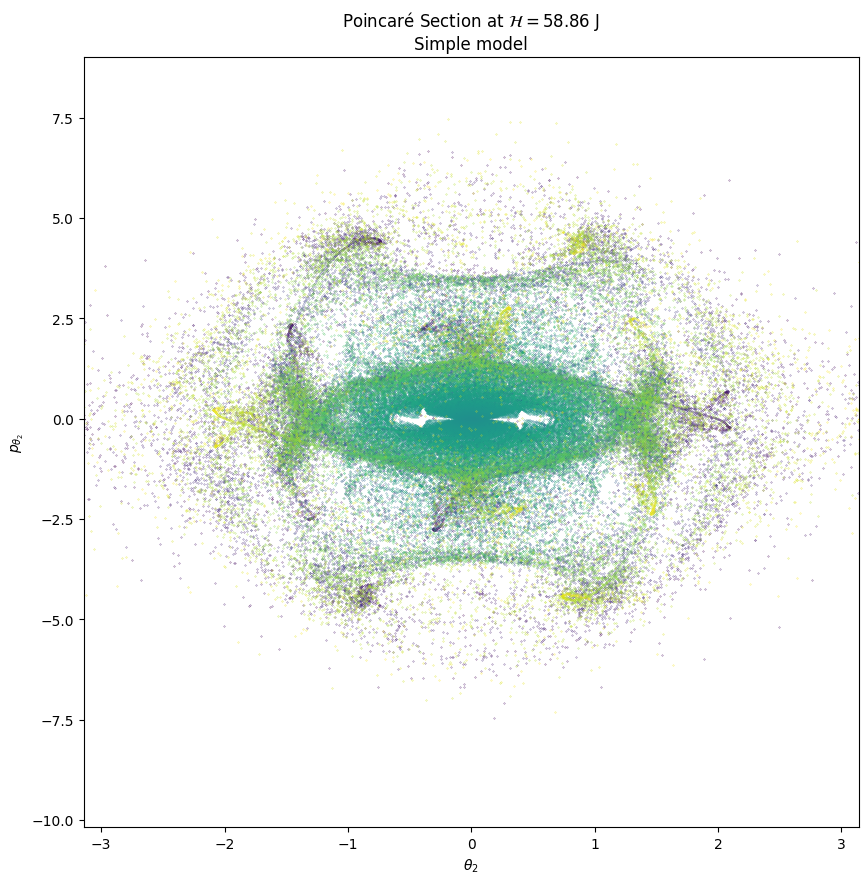

In [11]:
simple_explorer.plot_poincare_map()

In [12]:
print(simple_explorer.initial_condition_data.shape)
print(simple_explorer.initial_condition_data.size)

(720, 48000, 4)
138240000


#### `compound model`

In [13]:
compound_explorer.find_poincare_section()

Simulations Complete. Time taken: 56.11 seconds.


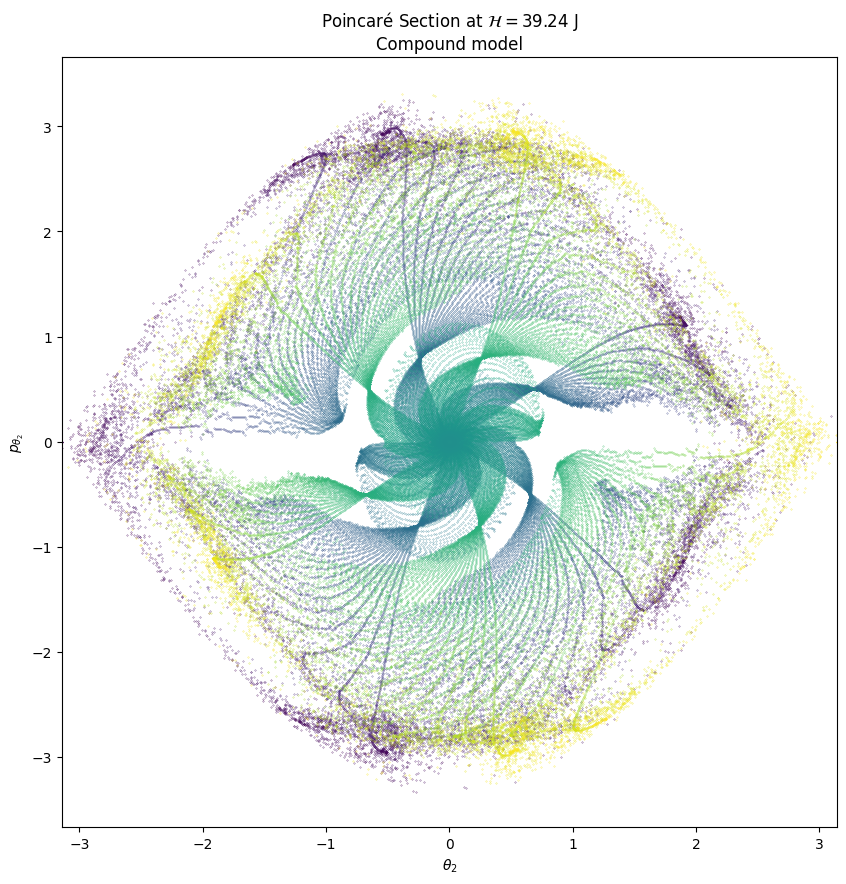

In [14]:
compound_explorer.plot_poincare_map()